In [42]:
from google.colab import files
uploaded = files.upload()
import io
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pickle
df = pd.read_csv(io.BytesIO(uploaded['data_clean.csv']))
df.head()

Saving data_clean.csv to data_clean (1).csv


,Unnamed: 0,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,...,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,4.0,0.0,9.200000,6.000000,0.200000,0.000000,62.600000,20.600000,2.600000,2.000000,48.600000,11.200000,0.800000,7.6,5.400000,0.400000,0.000000,65.40,22.600000,0.466000,0.400000,0.80000,0.200000,0.100000,66.400000,23.600000,4.0,1.0,6.400000,...,13.300000,8.800000,7.500000,5.100000,90.500000,26.800000,0.800000,0.300000,76.100000,17.300000,0.100000,9.400000,6.100000,0.000000,0.000000,98.800000,32.200000,0.336000,0.000000,0.900000,0.100000,0.050000,110.500000,43.300000,27.0,742.60,3.0,0.0,2.0,4.0,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,3.0,0.0,14.600000,9.100000,11.800000,7.300000,124.700000,42.100000,2.400000,1.900000,112.000000,32.000000,0.000000,12.3,10.200000,0.800000,0.000000,138.90,51.300000,0.399000,0.700000,1.00000,0.500000,0.225000,158.700000,69.600000,3.0,6.0,13.000000,...,24.571429,14.142857,10.571429,7.857143,98.571429,32.571429,6.428571,4.285714,61.857143,12.428571,0.000000,29.142857,18.142857,1.142857,0.000000,115.571429,44.714286,0.437143,0.285714,3.285714,0.857143,0.147143,158.142857,82.285714,25.0,1062.00,2.0,0.0,1.0,2.0,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0
2,2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,3.0,0.0,15.354839,11.322581,6.741935,4.387097,84.741935,38.580645,5.516129,3.806452,67.645161,23.258065,0.645161,14.0,12.193548,0.935484,0.096774,97.00,46.774194,0.496129,0.354839,2.16129,0.677419,0.295484,103.709677,52.548387,8.0,8.0,17.903226,...,14.466667,8.133333,2.800000,0.733333,91.066667,32.200000,4.866667,2.800000,78.266667,23.200000,0.266667,6.000000,4.400000,0.333333,0.133333,98.733333,35.733333,0.340000,0.066667,2.866667,0.666667,0.131333,102.133333,38.600000,33.0,604.40,2.0,0.0,1.0,3.0,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0
3,3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,4.0,0.0,17.000000,14.000000,13.750000,11.000000,109.500000,48.750000,13.000000,10.500000,116.250000,53.750000,0.500000,3.0,2.500000,0.500000,0.250000,136.25,70.250000,0.550000,0.250000,2.50000,1.250000,0.287500,154.750000,86.750000,4.0,0.0,12.250000,...,20.250000,13.375000,6.875000,5.625000,103.125000,38.500000,0.875000,0.750000,77.375000,20.375000,0.125000,13.250000,11.125000,0.000000,0.000000,110.875000,44.875000,0.446250,0.000000,2.375000,0.000000,0.000000,115.125000,48.875000,20.0,690.25

First Question: Which fighter, in absolute numbers, won the most fights in the whole timespan?*italicized text*

In [275]:
df_fighter = df[['R_fighter','B_fighter','Winner']]
df_fighter = df_fighter[df_fighter.Winner != 'Draw']

df_fighter['Winner_count'] = 'default value'
for i in df_fighter.index: 
    if df_fighter.loc[i]['Winner']== 'Red':
      df_fighter.Winner_count[i] = df_fighter.R_fighter[i]
    if df_fighter.loc[i]['Winner']== 'Blue':
      df_fighter.Winner_count[i] = df_fighter.B_fighter[i]

print('The fighter that has the most wins is: ' + df_fighter.Winner_count.value_counts().idxmax() + ' and he has ' + str(df_fighter.Winner_count.value_counts().max()) + ' wins')

The fighter that has the most wins is: Donald Cerrone and he has 23 wins


Second Question: How many fighters have no wins, just 1 win or multiple wins?

In [274]:
winner_list = df_fighter.Winner_count.value_counts().tolist()
x = 0
y = 0
for i in range(len(winner_list)):
  if winner_list[i] == 1:
    x += 1
  if winner_list[i] > 1:
    y += 1
print('There are ' + str(x) + ' people that have 1 win')
print('There are ' + str(y) + ' people that have more than 1 win')

There are 382 people that have 1 win
There are 885 people that have more than 1 win


In [195]:
R_fighter = df_fighter.R_fighter.values.tolist()
B_fighter = df_fighter.B_fighter.values.tolist()
fighters= list(set(fighters))
z = 0
for i in range(len(fighters)):
  if fighters[i] not in df_fighter.Winner_count.values:
    z += 1

print('There are ' + str(z) + ' people that have no wins')

There are 641 people that have no wins


Third Question: What does the density - distribution of the height/weight-ratio look like? 

Text(0.5, 1.0, 'Distribution of the height-weíght-ratio among the fighters')

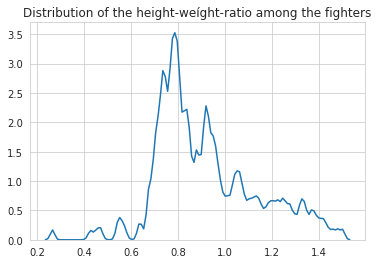

In [223]:
%matplotlib inline
df['R_ratio'] = df['R_Height_cms'] / df['R_Weight_lbs']
df['B_ratio'] = df['B_Height_cms'] / df['B_Weight_lbs']
R_ratio = df.R_ratio.tolist()
B_ratio = df.B_ratio.tolist()
ratio = [*R_ratio,*B_ratio]
ratio=list(set(ratio)) #drop reaccuring values (if a fighter fought more than one fight)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.kdeplot(np.array(ratio), bw=0.01)
plt.title('Distribution of the height-weíght-ratio among the fighters')

Fourth Question: What is the percentage of rounds won by KO or technical KO?

In [236]:
R_KO = df['R_win_by_KO/TKO'].sum()
R_wins=df['R_wins'].sum()
B_KO = df['B_win_by_KO/TKO'].sum()
B_wins=df['B_wins'].sum()
KO_sum_perc = ((R_KO / R_wins) + (B_KO / B_wins))/2
print('{percent:.0%}'.format(percent = KO_sum_perc) + ' of all fights are won by KO or technical KO')

35% of all fights are won by KO or technical KO


Fifth Question: What is the maximum age a fighter has won a fight with?

In [281]:
import warnings
warnings.filterwarnings('ignore')
df_age = df[['R_fighter','B_fighter','B_age','R_age','Winner']]

df_age = df_age[df_age.Winner != 'Draw']
df_age['Winner_count'] = 'default value'
for i in df_age.index: 
    if df_age.loc[i]['Winner']== 'Red':
      df_age.Winner_count[i] = df_age.R_age[i]
    if df_age.loc[i]['Winner']== 'Blue':
      df_age.Winner_count[i] = df_age.B_age[i]

Winning_age = df_age[df_age.Winner_count == df_age.Winner_count.max()].reset_index()
if Winning_age.Winner[0] == 'Red':
  win = Winning_age.R_fighter[0]
if Winning_age.Winner[0] == 'Blue':
  win = Winning_age.B_fighter[0]  
print('The fighter that was the oldest when he won a fight is ' + win + ' at ' + str(df_age.Winner_count.max()) + ' years old')

The fighter that was the oldest when he won a fight is Randy Couture at 47.0 years old
